In [1]:
# Para a correta execução do notebook será necessário instalar a biblioteca PyCaret
# pip install pycaret
# pip install openpyxl (Caso ocorra problema na leitura da base de dados)
# Tutorial: https://www.youtube.com/watch?v=88jD1nnkNfM&ab_channel=Let%27sData
# Site: https://www.learndatasci.com/tutorials/introduction-pycaret-machine-learning/
# !pip install pandas

!pip install openpyxl
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

0    757
1    227
Name: evolucaoCaso, dtype: int64

Valor 1 representa 23.0691% do dataset.



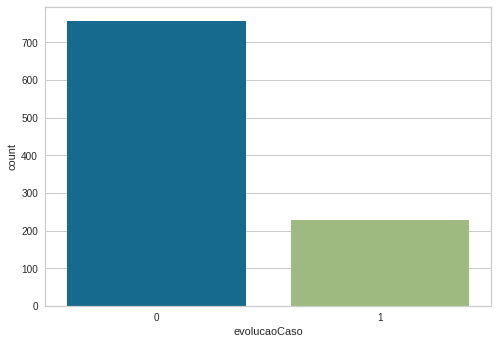

In [10]:
# covidData = pd.read_excel("../../database/novosDados/suporte_dados_final_Jan2021.xlsx")
#covidData = pd.read_excel("../../database/novosDados/balanceados/balanceados_60_40_Jan2021.xlsx")
covidData = pd.read_excel("../../database/novosDados/balanceados/rn_sus_70_30.xlsx")

covidData['evolucaoCaso'].replace('Cura', 0, inplace = True);
covidData['evolucaoCaso'].replace('Óbito', 1, inplace = True);

# ver o balanceamento das classes
print(covidData['evolucaoCaso'].value_counts())
print("\nValor 1 representa {:.4f}% do dataset.\n".format((covidData[covidData['evolucaoCaso'] == 1].shape[0] / covidData.shape[0]) * 100))
 
# plotar gráfico de barras para as Classes
sns.countplot('evolucaoCaso', data = covidData);

In [11]:
covidData.dtypes

tosse               int64
febre               int64
garganta            int64
dispneia            int64
cabeca              int64
coriza              int64
hipogeusia          int64
anosmia             int64
fadiga              int64
nauseas             int64
mialgia             int64
diarreia            int64
cardiacas           int64
diabetes            int64
respiratorias       int64
renais              int64
imunologica         int64
obesidade           int64
imunossupressao     int64
gestante            int64
puerpera            int64
resultadoTeste      int64
evolucaoCaso        int64
idade              object
dtype: object

In [12]:
setup_classificao = setup(data = covidData, target = 'evolucaoCaso', train_size=0.7)

,Description,Value
0,session_id,8082
1,Target,evolucaoCaso
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(984, 24)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,23
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
get_config('X')

,CS_SEXO_1,NU_IDADE_N_1,NU_IDADE_N_10,NU_IDADE_N_3,NU_IDADE_N_4,NU_IDADE_N_5,NU_IDADE_N_6,NU_IDADE_N_7,NU_IDADE_N_8,NU_IDADE_N_9,...,TOSSE_2,GARGANTA_1,DISPNEIA_1,DESC_RESP_1,SATURACAO_2,DIARREIA_1,VOMITO_2,FATOR_RISC_2,CARDIOPATI_2,DIABETES_2
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
392,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
393,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
394,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [13]:
melhores_modelos = compare_models(n_select= 20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8664,0.8914,0.6890,0.7552,0.7079,0.6230,0.6325,0.2040
gbc,Gradient Boosting Classifier,0.8663,0.9091,0.6941,0.7459,0.7105,0.6248,0.6314,0.0810
knn,K Neighbors Classifier,0.8634,0.8715,0.6713,0.7554,0.6991,0.6128,0.6221,0.0270
ada,Ada Boost Classifier,0.8606,0.9068,0.6592,0.7421,0.6948,0.6053,0.6093,0.0880
lda,Linear Discriminant Analysis,0.8591,0.9047,0.6232,0.7559,0.6779,0.5897,0.5974,0.0180
ridge,Ridge Classifier,0.8576,0.0000,0.5868,0.7772,0.6630,0.5761,0.5884,0.0150
lr,Logistic Regression,0.8547,0.9079,0.6169,0.7463,0.6694,0.5784,0.5864,0.5270
lightgbm,Light Gradient Boosting Machine,0.8518,0.8692,0.6761,0.7102,0.6843,0.5887,0.5947,0.0410
et,Extra Trees Classifier,0.8460,0.8680,0.6243,0.7270,0.6544,0.5586,0.5724,0.1800
dt,Decision Tree Classifier,0.8184,0.7708,0.5879,0.6630,0.6027,0.4889,0.5030,0.0170


/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:10

/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:10

In [13]:
melhores_modelos[0]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6344, verbose=0,
                       warm_start=False)

In [14]:
random_forest_tunado = tune_model(melhores_modelos[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7857,0.7719,1.0000,0.7600,0.8636,0.4043,0.5033
1,0.7500,0.7544,0.9474,0.7500,0.8372,0.3288,0.3746
2,0.6786,0.6491,0.8947,0.7083,0.7907,0.1370,0.1561
3,0.7143,0.6901,0.8947,0.7391,0.8095,0.2583,0.2781
4,0.6429,0.7427,0.9474,0.6667,0.7826,-0.0687,-0.1325
5,0.7143,0.5938,0.9500,0.7308,0.8261,0.0968,0.1316
6,0.7857,0.8938,1.0000,0.7692,0.8696,0.3226,0.4385
7,0.7407,0.7829,0.9474,0.7500,0.8372,0.2410,0.2868
8,0.7407,0.6711,0.8947,0.7727,0.8293,0.3026,0.3171
9,0.7037,0.6842,0.9474,0.7200,0.8182,0.0924,0.1262


In [15]:
random_forest_tunado

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=-1, oob_score=False, random_state=6344, verbose=0,
                       warm_start=False)

In [11]:
modelo_final = finalize_model(random_forest_tunado)

# Usando o Feature Selection

In [12]:
setupFeature = setup(data = covidData, target = 'EVOLUCAO', feature_selection = True)

ValueError: Target parameter: EVOLUCAO does not exist in the data provided.

In [ ]:
#setupFeature
plot_model(melhores_modelos[0], plot='feature')

In [ ]:
#lr = create_model('lr')
# plotting a model
plot_model(melhores_modelos[0])

# Treinando o melhor modelo


In [17]:
# modeloDados = dadosSemVentilacao
# modeloDados = dadosSemUTI
# modeloDados = covidData
# modeloDados = dadosSemAmbos
# modeloDados = dadosComAmbos

modeloDados = covidData
modeloDados

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,FATOR_RISC,CARDIOPATI,DIABETES,SUPORT_VEN
0,0,5,4,2,1,1,2,1,1,1,2,2,2,2,2,1
1,0,4,4,2,1,2,1,2,2,2,1,2,1,2,2,0
2,1,10,4,2,1,2,2,1,2,1,2,2,2,2,2,0
3,0,5,4,2,1,1,2,1,1,1,1,2,1,1,2,1
4,0,7,4,2,1,1,2,1,1,2,2,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1,5,1,2,2,1,2,1,1,2,2,2,2,2,2,0
392,1,10,4,2,2,1,2,1,1,1,2,2,1,1,1,1
393,0,4,1,2,2,1,2,1,2,2,2,2,2,2,2,1
394,1,6,4,1,1,2,2,2,1,1,2,2,1,1,2,1


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(modeloDados.drop('SUPORT_VEN',axis=1),
                                                    modeloDados['SUPORT_VEN'],
                                                    test_size=0.3,
                                                    random_state=42);

In [19]:
from sklearn.ensemble import RandomForestClassifier

#classifier_rf = RandomForestClassifier(random_state=1986, n_estimators=45, criterion='gini', max_depth= 6, n_jobs=-1)

classifier_rf = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=-1, oob_score=False, random_state=6344, verbose=0,
                       warm_start=False)

classifier_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=-1, oob_score=False, random_state=6344, verbose=0,
                       warm_start=False)

In [20]:
from sklearn.metrics import accuracy_score

#Realizando a predição
resultRF = classifier_rf.predict(x_test)

# Verificando a acurácia
print(accuracy_score(y_test, resultRF))

0.7310924369747899


In [21]:
# Verificando os melhores dados
from sklearn.ensemble import RandomForestClassifier

feature_importances = pd.DataFrame(classifier_rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
DISPNEIA,0.217605
SATURACAO,0.182107
DESC_RESP,0.180351
NU_IDADE_N,0.117556
FATOR_RISC,0.045113
FEBRE,0.042275
GARGANTA,0.034570
DIABETES,0.033720
TOSSE,0.032301
CS_RACA,0.030318


In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultRF))

              precision    recall  f1-score   support

           0       0.60      0.26      0.36        35
           1       0.75      0.93      0.83        84

    accuracy                           0.73       119
   macro avg       0.68      0.59      0.59       119
weighted avg       0.71      0.73      0.69       119

